In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from numpy import ndarray
%matplotlib inline

In [2]:
# Считываем данные из файла.
data = pd.read_csv('Weibull.csv')
print(data[:5], len(data))

    1.4
0  0.00
1  0.00
2  3.42
3  0.00
4  0.18 3651


In [3]:
# Функция заменяющая нули на 0.0001.
def null_changer(x):
    if x == 0.:
        return 0.0001
    else:
        return x

In [4]:
# Как видим, одно из значений съехало в название столбца.(1.4)
# Считаем данные в np.array.
# Заменим нули на 0.0001.
X = list(map(null_changer, data[data.columns[0]]))
X.insert(0, 1.4)
X = np.array(X)

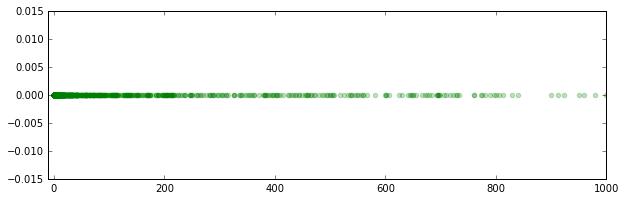

In [5]:
# Посмотрим на наши данные.
plt.figure(figsize=(10, 3))
plt.scatter(X, np.zeros(len(X)), alpha = 0.25, color = "g", label = "Our sample from Cauchy.csv")
plt.xlim([-10, 1000])
plt.show()

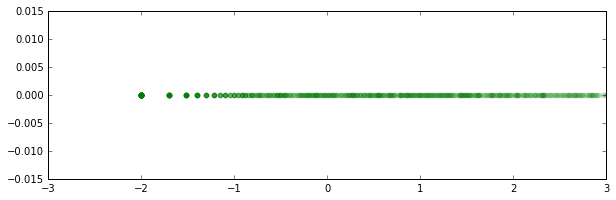

In [6]:
# И посмотрим на десятичные логарифмы наших данных.
plt.figure(figsize=(10, 3))
plt.scatter(np.log10(X), np.zeros(len(X)), alpha = 0.05, color = "g", label = "Our sample from Cauchy.csv")
plt.xlim([-3, 3])
plt.show()

По графику выборки данных видно, что больше всего точек, находятся у 0, а по графику логарифмов мало что понятно.

К задаче.

В полночь работники банка измеряют две величины: $X^1$ — максимальное значение баланса за день, $X^2$ — значение баланса в полночь. Считается, что величина $X = X^1 − X^2$ имеет распределение Вейбулла с функцией распределения $1 − e^{(-x)^\gamma} I(x \geq 0)$, где $\gamma > 0$ - параметр формы.

Плотность этого распределения $\gamma x^{\gamma - 1} e^{-x^\gamma} I(x \geq 0)$, 

а ее логарифм $\ln \gamma + (\gamma - 1) \ln x - x^\gamma, x \geq 0$

Оценим параметр формы методом максимального правдоподобия, оценку произведем по сетке в логарифмической шкале, зная что 
$log_{10} \gamma \in [-2, 2]$, шаг $10^{-3}$.

In [7]:
# Функция логарифма правдоподобия.
# При параметре a = 1, плотность распределения в scipy.stats.exponweib совпадает с нашей.
def loglike(gamma, X):
    return stats.exponweib.logpdf(X, a = 1., c=gamma).sum()

In [16]:
# Функция подсчета при каком параметре gamma правдоподобие максимально.
# Принимает на вход логарифмическую шкалу.
def fit(log_space, X):
    like_array = [loglike(np.power(10, i), X) for i in log_space]
    optimal_gamma = log_space[np.argmax(like_array)]
    return optimal_gamma, np.power(10, optimal_gamma), np.max(like_array)

In [17]:
# Сетка в логарифмической шкале.
grid = np.linspace(-2.,2., num = 4. / 0.001)

а) Оценим параметр формы по первым четырем годам.

In [18]:
result_half = fit(grid, X[:(365 * 4)])

In [19]:
print(result_half)

(-0.8087021755438859, 0.15534519495338567, -1058.7980530820219)


б) Оценим параметр формы по всей выборке.

In [10]:
result_all = fit(grid, X)

In [11]:
print(result_all)

(-0.80270067516879218, 0.15750680602705364)


In [12]:
print(result_all[0] - result_half[0], result_all[1] - result_half[1])

0.00600150037509 0.00216161107367


#### Вывод: Оценки $\gamma$ методом максимального правдоподобия за 4 года и за 10 лет равны соответственно $\gamma = 0.1553, log_{10}(\gamma) = -0.8087, \gamma = 0.1575, log_{10}(\gamma) = -0.8027 $  различаются на 6 тысячных в логарифмической шкале, и на около 2 тысячных в реальной. Значит 4х лет вполне достаточно для оценки.
